# Random Forest Classification

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sn
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%cd Z:\PPMI_Data\Excels\NonMotors\Derived250\Female\GeneCpG\Xtras\TopCpG_NMI_Compare
df = pd.read_csv('NMI_Methylome_Female12_Data.csv')
df['APPRDX'] = df['APPRDX'] -1
df1 = df.drop(['PATNO'], axis = 1)
print(df1.shape)
df1.head(2)

Z:\PPMI_Data\Excels\NonMotors\Derived250\Female\GeneCpG\Xtras\TopCpG_NMI_Compare
(150, 729)


,APPRDX,cg15487922,cg05702234,cg24441068,cg20699097,cg14245173,cg12130295,cg12162792,cg25537999,cg21605784,...,cg06577521,cg05392540,cg25290888,cg07573863,cg01112653,cg19755272,cg02746620,cg11541225,cg22020954,cg24822602
0,1,0.787071,0.886493,0.009892,0.561816,0.037158,0.917261,0.855302,0.927314,0.929662,...,0.876887,0.860581,0.795094,0.926100,0.870502,0.873026,0.873300,0.812509,0.908503,0.910111
1,0,0.771991,0.891774,0.010496,0.522515,0.030703,0.920615,0.887998,0.864310,0.921895,...,0.847965,0.818291,0.825354,0.922722,0.847364,0.892314,0.884273,0.861410,0.910162,0.931325


# Running Model with different Features

## RanFor 100 times, NMI 0.12

In [3]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(30))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.8333333333333334
2
Mean accuracy: 0.8333333333333334
3
Mean accuracy: 0.8666666666666666
4
Mean accuracy: 0.7833333333333333
5
Mean accuracy: 0.7666666666666666
6
Mean accuracy: 0.7833333333333333
7
Mean accuracy: 0.7
8
Mean accuracy: 0.85
9
Mean accuracy: 0.7833333333333333
10
Mean accuracy: 0.7499999999999999
11
Mean accuracy: 0.7833333333333333
12
Mean accuracy: 0.75
13
Mean accuracy: 0.85
14
Mean accuracy: 0.8166666666666667
15
Mean accuracy: 0.75
16
Mean accuracy: 0.8
17
Mean accuracy: 0.8666666666666668
18
Mean accuracy: 0.7666666666666667
19
Mean accuracy: 0.8
20
Mean accuracy: 0.7666666666666666
21
Mean accuracy: 0.7666666666666666
22
Mean accuracy: 0.7
23
Mean accuracy: 0.8333333333333334
24
Mean accuracy: 0.7833333333333333
25
Mean accuracy: 0.75
26
Mean accuracy: 0.7666666666666668
27
Mean accuracy: 0.8
28
Mean accuracy: 0.7833333333333334
29
Mean accuracy: 0.7666666666666666
30
Mean accuracy: 0.7499999999999999
31
Mean accuracy: 0.8166666666666668
32
Mean

In [4]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NMI_Methylome_Female12_100RF.csv", index=False)

0.7788333333333329


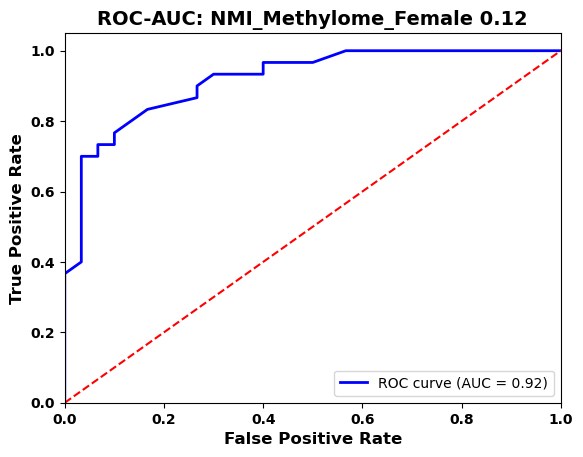

In [5]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: NMI_Methylome_Female 0.12', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_NMI_Methylome_Female12.svg')
plt.savefig('ROC_AUC_NMI_Methylome_Female12.pdf')
plt.show()


## RanFor 100 times, NMI 0.13

In [6]:
df = pd.read_csv('NMI_Methylome_Female13_Data.csv')
df['APPRDX'] = df['APPRDX'] -1
df1 = df.drop(['PATNO'], axis = 1)
print(df1.shape)
df1.head(2)

(150, 333)


,APPRDX,cg15487922,cg05702234,cg24441068,cg20699097,cg14245173,cg12130295,cg12162792,cg25537999,cg21605784,...,cg10304506,cg01276843,cg26470958,cg05389652,cg10387956,cg25562059,cg16123908,cg23060256,cg16670864,cg02294563
0,1,0.787071,0.886493,0.009892,0.561816,0.037158,0.917261,0.855302,0.927314,0.929662,...,0.853080,0.886033,0.917312,0.802816,0.774342,0.832651,0.912145,0.876982,0.087812,0.350083
1,0,0.771991,0.891774,0.010496,0.522515,0.030703,0.920615,0.887998,0.864310,0.921895,...,0.867486,0.888180,0.924157,0.795173,0.857429,0.766510,0.899257,0.855902,0.064308,0.434085


In [7]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(30))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.8166666666666668
2
Mean accuracy: 0.8166666666666667
3
Mean accuracy: 0.8166666666666668
4
Mean accuracy: 0.8
5
Mean accuracy: 0.7166666666666666
6
Mean accuracy: 0.7833333333333332
7
Mean accuracy: 0.7333333333333333
8
Mean accuracy: 0.8333333333333333
9
Mean accuracy: 0.8166666666666668
10
Mean accuracy: 0.7833333333333333
11
Mean accuracy: 0.7333333333333333
12
Mean accuracy: 0.7
13
Mean accuracy: 0.8333333333333333
14
Mean accuracy: 0.7833333333333333
15
Mean accuracy: 0.8
16
Mean accuracy: 0.7333333333333333
17
Mean accuracy: 0.7833333333333334
18
Mean accuracy: 0.8
19
Mean accuracy: 0.75
20
Mean accuracy: 0.7666666666666667
21
Mean accuracy: 0.8166666666666667
22
Mean accuracy: 0.7666666666666666
23
Mean accuracy: 0.7833333333333334
24
Mean accuracy: 0.7833333333333333
25
Mean accuracy: 0.7333333333333333
26
Mean accuracy: 0.75
27
Mean accuracy: 0.8
28
Mean accuracy: 0.7499999999999999
29
Mean accuracy: 0.7000000000000001
30
Mean accuracy: 0.7499999999999999
31

In [8]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NMI_Methylome_Female13_100RF.csv", index=False)

0.7768333333333333


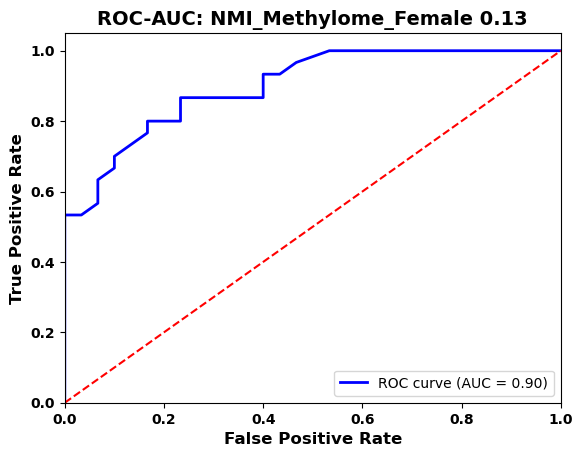

In [9]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: NMI_Methylome_Female 0.13', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_NMI_Methylome_Female13.svg')
plt.savefig('ROC_AUC_NMI_Methylome_Female13.pdf')
plt.show()


## RanFor 100 times, NMI 0.15

In [10]:
df = pd.read_csv('NMI_Methylome_Female15_Data.csv')
df['APPRDX'] = df['APPRDX'] -1
df1 = df.drop(['PATNO'], axis = 1)
print(df1.shape)
df1.head(2)

(150, 63)


,APPRDX,cg15487922,cg05702234,cg24441068,cg20699097,cg14245173,cg12130295,cg12162792,cg25537999,cg21605784,...,cg04550367,cg18765724,cg26405759,cg17080573,cg22011888,cg26115667,cg01219777,cg25588592,cg27094323,cg16537985
0,1,0.787071,0.886493,0.009892,0.561816,0.037158,0.917261,0.855302,0.927314,0.929662,...,0.908233,0.926035,0.910940,0.637042,0.889954,0.747158,0.849757,0.879274,0.104415,0.683303
1,0,0.771991,0.891774,0.010496,0.522515,0.030703,0.920615,0.887998,0.864310,0.921895,...,0.890952,0.862585,0.918484,0.642083,0.882415,0.702583,0.833641,0.885489,0.316684,0.865309


In [11]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(30))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.7833333333333333
2
Mean accuracy: 0.7833333333333334
3
Mean accuracy: 0.8166666666666668
4
Mean accuracy: 0.75
5
Mean accuracy: 0.6666666666666667
6
Mean accuracy: 0.7833333333333334
7
Mean accuracy: 0.75
8
Mean accuracy: 0.85
9
Mean accuracy: 0.8166666666666667
10
Mean accuracy: 0.7333333333333333
11
Mean accuracy: 0.6666666666666666
12
Mean accuracy: 0.6833333333333333
13
Mean accuracy: 0.7833333333333333
14
Mean accuracy: 0.8333333333333333
15
Mean accuracy: 0.7666666666666667
16
Mean accuracy: 0.7833333333333334
17
Mean accuracy: 0.7833333333333334
18
Mean accuracy: 0.7833333333333333
19
Mean accuracy: 0.7333333333333333
20
Mean accuracy: 0.8666666666666668
21
Mean accuracy: 0.8833333333333334
22
Mean accuracy: 0.7500000000000001
23
Mean accuracy: 0.7666666666666667
24
Mean accuracy: 0.7833333333333333
25
Mean accuracy: 0.7166666666666666
26
Mean accuracy: 0.7
27
Mean accuracy: 0.7666666666666667
28
Mean accuracy: 0.75
29
Mean accuracy: 0.7
30
Mean accuracy: 0.7


In [12]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NMI_Methylome_Female15_100RF.csv", index=False)

0.7679999999999997


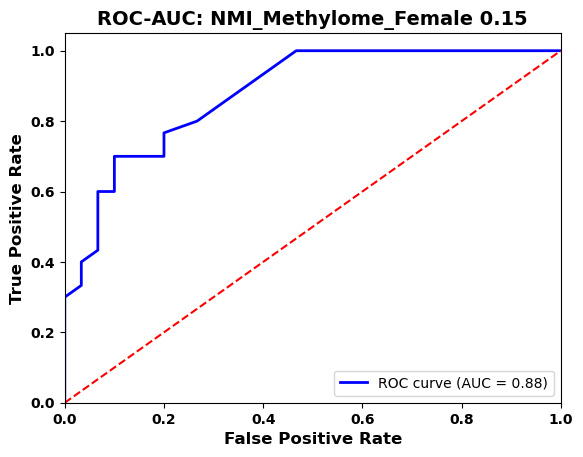

In [13]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: NMI_Methylome_Female 0.15', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_NMI_Methylome_Female15.svg')
plt.savefig('ROC_AUC_NMI_Methylome_Female15.pdf')
plt.show()
